In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Get the pygame library
import pygame
pygame.mixer.init()

In [3]:
# Play the file using pygame
pygame.mixer.music.load('such_good_fun.wav')
pygame.mixer.music.play()

In [4]:
# Loading the wav file as an array
import scipy.io.wavfile as wf
sample_rate, data = wf.read('such_good_fun.wav')

In [5]:
sample_rate

44100

In [6]:
data

array([[  20, -110],
       [  13, -109],
       [  -8, -106],
       ..., 
       [ -76,   40],
       [ -88,   48],
       [ -73,   31]], dtype=int16)

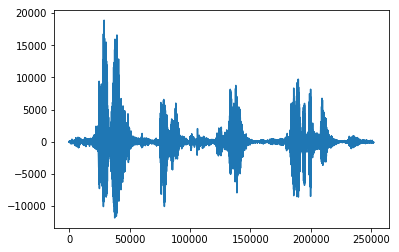

In [7]:
# The left channel
plt.plot(data[:, 0]);

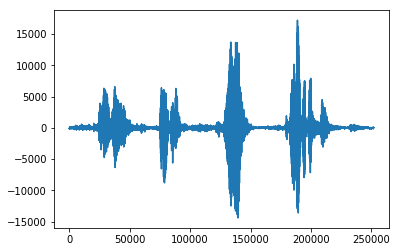

In [8]:
# The right channel
plt.plot(data[:, 1]);

In [9]:
# The maximum value on either channel
all_max = data.max()
all_max

18874

In [10]:
# Decrease the volume quite a bit
quiet_data = data / 20

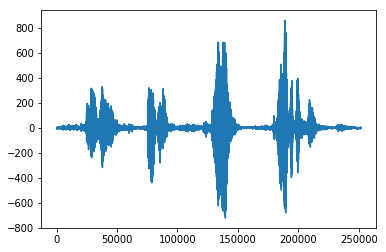

In [11]:
# The right channel for the quiet version
plt.plot(quiet_data[:, 1]);

In [12]:
def write_and_play(sound_data):
    # Function to write a wav file and then play it
    wf.write('wav_file.wav', 44100, sound_data.astype('int16'))
    pygame.mixer.music.load('wav_file.wav')
    pygame.mixer.music.play()

In [13]:
write_and_play(quiet_data)

In [14]:
# The shape of the data
data.shape

(251904, 2)

In [15]:
# The shape is the number of samples by the number of channels (here stereo)
n_samples, n_channels = data.shape
n_samples

251904

In [16]:
n_channels

2

In [17]:
# Do something dreadful with the sound file
# Replace everything over threshold with 5000
# Replace everything under threshold with 0
thresholded_data = data.copy()
thresh = 500
for sample_index in range(n_samples):
    for channel_index in range(n_channels):
        sample = data[sample_index, channel_index]
        if sample > -thresh:
            sample = 5000
        elif sample < -thresh:
            sample = -5000
        else:
            sample = 0
        thresholded_data[sample_index, channel_index] = sample

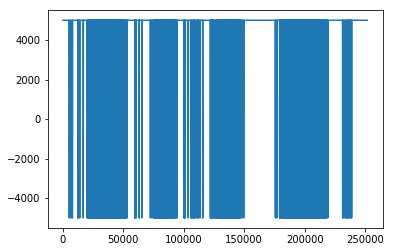

In [18]:
plt.plot(thresholded_data[:, 0])

In [19]:
write_and_play(thresholded_data)

In [20]:
# We can make this mono by taking the average across channels
mono_data = data.mean(axis=1)

In [21]:
write_and_play(mono_data)

In [22]:
# How long is the clip (in seconds)
# Divide number of samples by sample rate
n_samples / sample_rate

5.712108843537415

In [23]:
# Now we make some sine waves
import numpy as np
two_seconds = np.arange(sample_rate * 2) / sample_rate
two_seconds

array([  0.00000000e+00,   2.26757370e-05,   4.53514739e-05, ...,
         1.99993197e+00,   1.99995465e+00,   1.99997732e+00])

In [24]:
# Frequency
# A4 is 440 Hz : http://pages.mtu.edu/~suits/notefreqs.html
frequency = 440

In [25]:
sine_wave = np.sin(two_seconds * 2 * np.pi * frequency) * 5000
write_and_play(sine_wave)

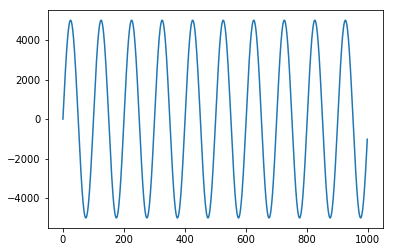

In [26]:
# Plot the first few sample of the sine wave
plt.plot(sine_wave[:1000]);